# Exploratory Data Analysis – Dataset 1

This notebook performs a detailed exploratory data analysis (EDA) on Dataset 1.  
The goals are to:
- Understand the distribution and relationships of the features
- Identify important variables related to heart disease
- Detect patterns, anomalies, and trends
- Generate insights to guide the statistical testing and modeling stages

In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro

from src.overview_functions import convert_to_string_to_lower, display_column_distribution

In [13]:
dataset1 = pd.read_csv('../data/cleaned_data/dataset1_cleaned.csv')
dataset1

,age,gender,heart_rate,pressure_high,pressure_low,glucose,kcm,troponin,heart_disease
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1311,44,1,94,122,67,204.0,1.63,0.006,0
1312,66,1,84,125,55,149.0,1.33,0.172,1
1313,45,1,85,168,104,96.0,1.24,4.250,1
1314,54,1,58,117,68,443.0,5.80,0.359,1


In [14]:
dataset1.describe()

,age,gender,heart_rate,pressure_high,pressure_low,glucose,kcm,troponin,heart_disease
count,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000
mean,56.208207,0.660334,75.982523,127.139058,72.217325,146.718617,15.303153,0.360970,0.613982
std,13.637762,0.473776,15.276877,26.144139,14.007815,74.979672,46.375924,1.155668,0.487020
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.657500,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,170.000000,5.812500,0.085250,1.000000
max,103.000000,1.000000,135.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


In [15]:
#Check the structure of the dataset1
dataset1.shape

(1316, 9)

In [16]:
dataset1.head(5)

,age,gender,heart_rate,pressure_high,pressure_low,glucose,kcm,troponin,heart_disease
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [17]:
#Check data types
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1316 non-null   int64  
 1   gender         1316 non-null   int64  
 2   heart_rate     1316 non-null   int64  
 3   pressure_high  1316 non-null   int64  
 4   pressure_low   1316 non-null   int64  
 5   glucose        1316 non-null   float64
 6   kcm            1316 non-null   float64
 7   troponin       1316 non-null   float64
 8   heart_disease  1316 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.7 KB


In [18]:
# Check for empty values
dataset1.isna().sum()

age              0
gender           0
heart_rate       0
pressure_high    0
pressure_low     0
glucose          0
kcm              0
troponin         0
heart_disease    0
dtype: int64

In [19]:
dataset1['heart_disease'].value_counts(normalize=True) * 100

heart_disease
1    61.398176
0    38.601824
Name: proportion, dtype: float64

###### Distribution of heart disease into dataset 1
###### 0 - Negative
###### 1 - Positive


In [20]:
dataset1['gender'].value_counts(normalize=True) * 100

gender
1    66.033435
0    33.966565
Name: proportion, dtype: float64

###### Distribution of genders into dataset 1
###### 0 - female
###### 1 - male

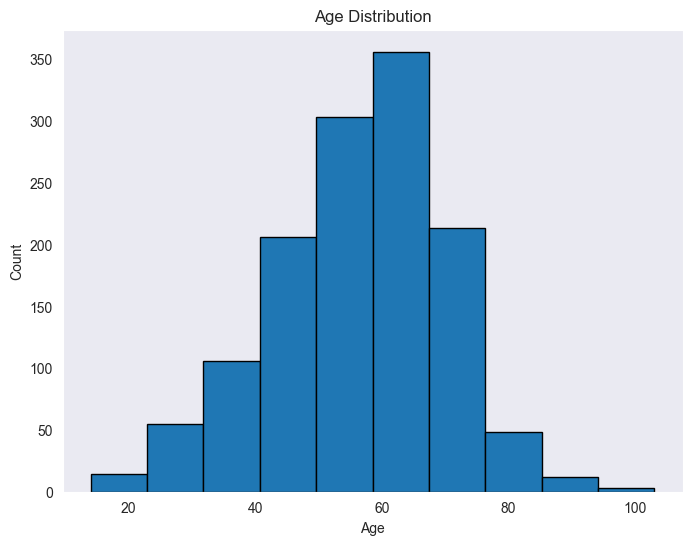

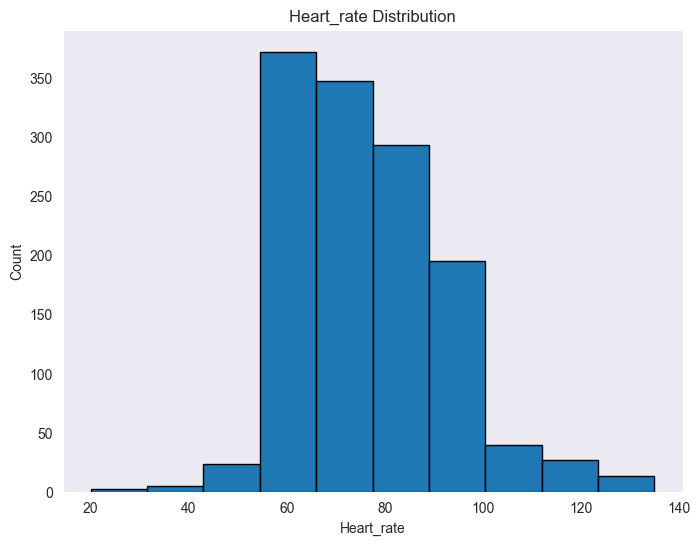

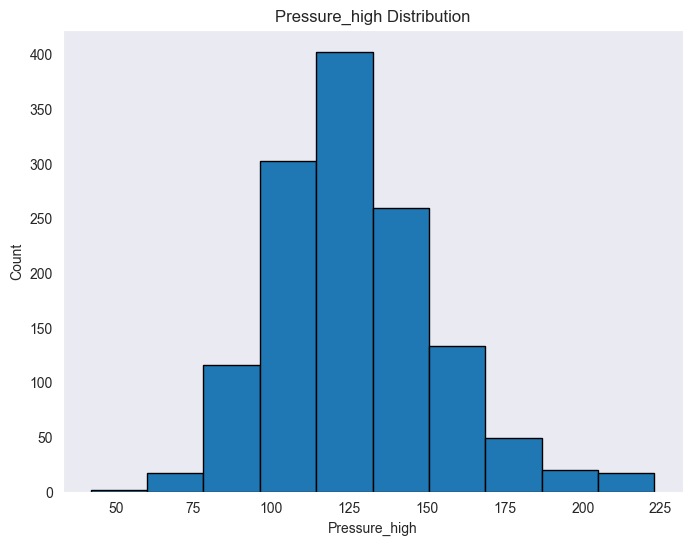

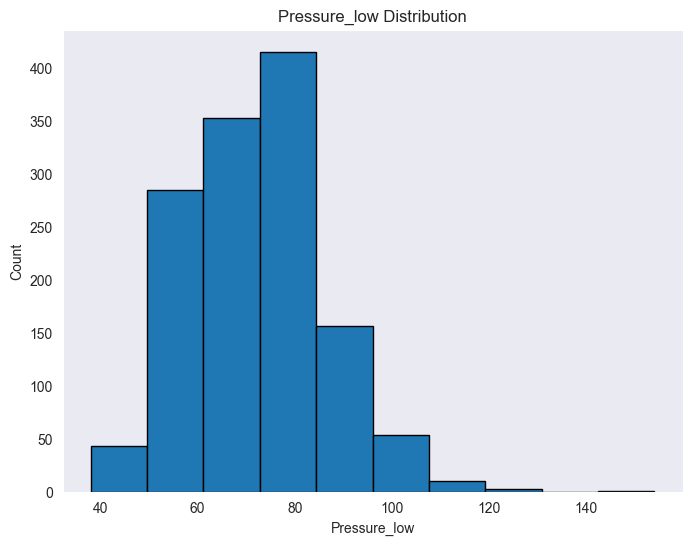

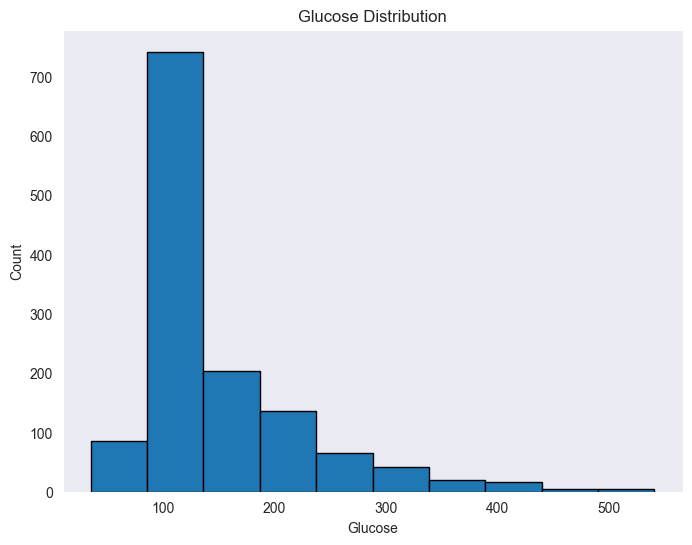

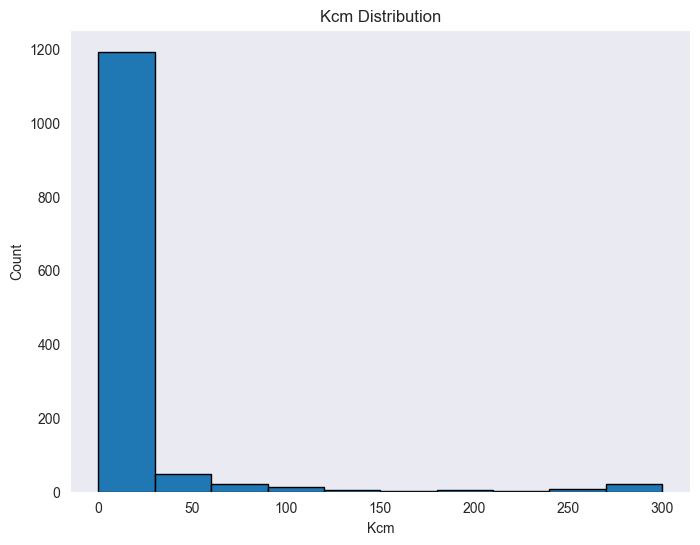

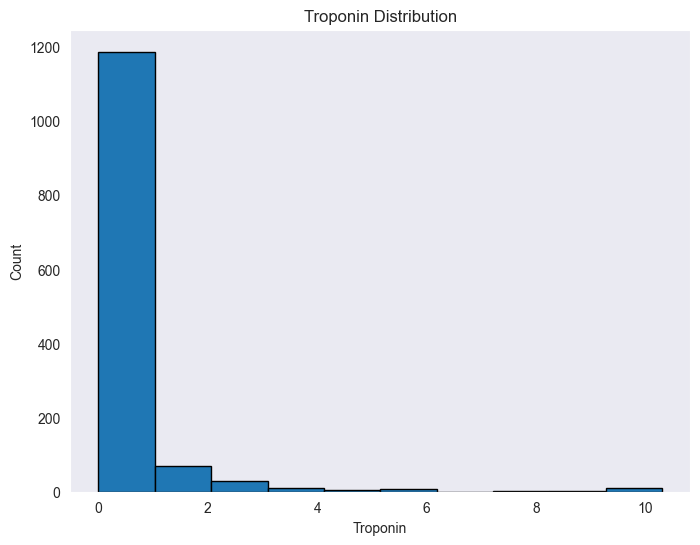

In [21]:
numeric_columns = dataset1.select_dtypes(include=['int64', 'float64']).columns.drop(['heart_disease', 'gender'])

for col in numeric_columns:
    display_column_distribution(dataset1, col)

### Numerical Features vs. Target (Heart Disease)

##### In the following boxplot visualizations, we will observe the separation of patients with and without heart disease based on their respective health indicators.


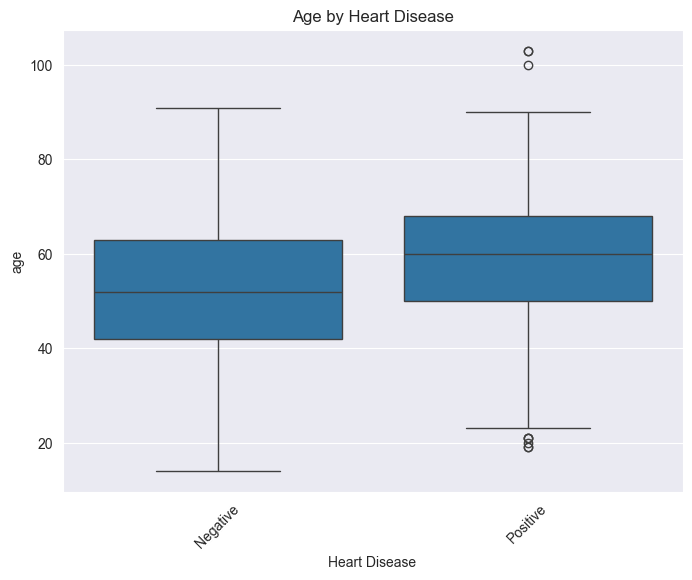

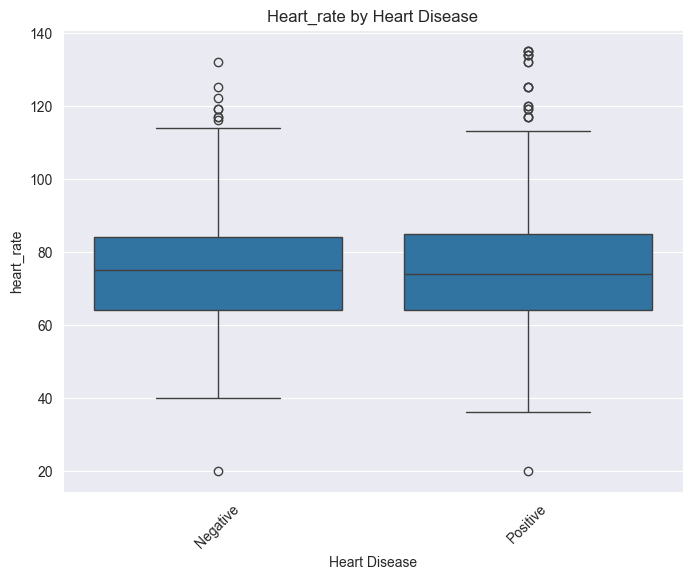

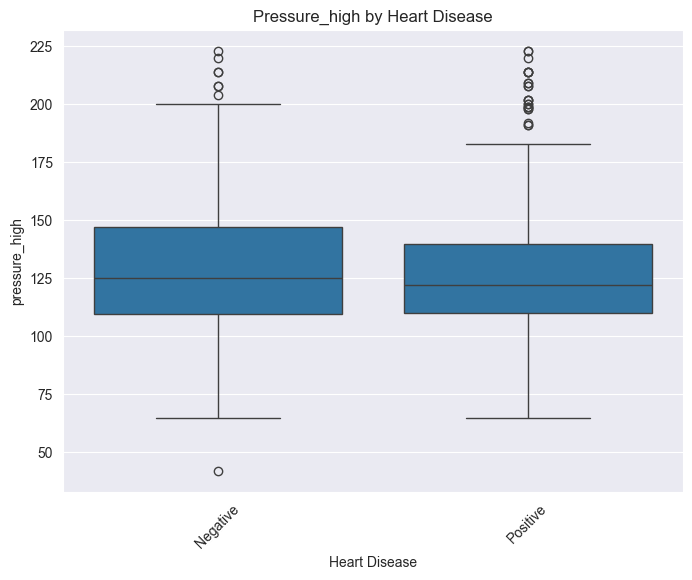

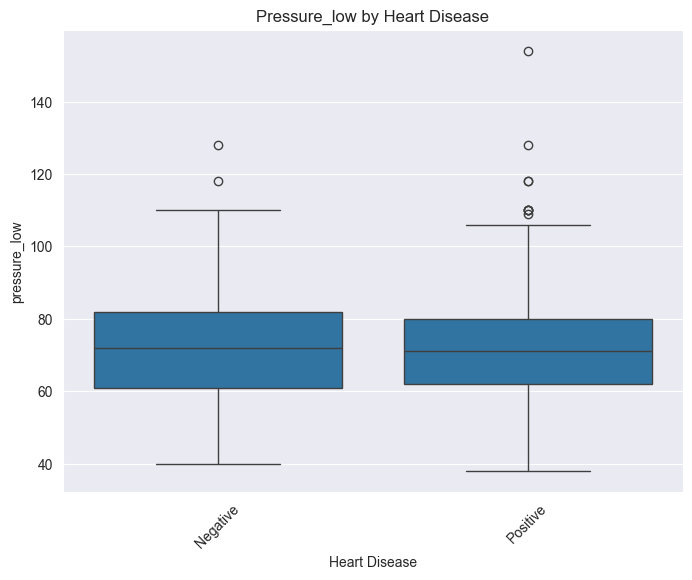

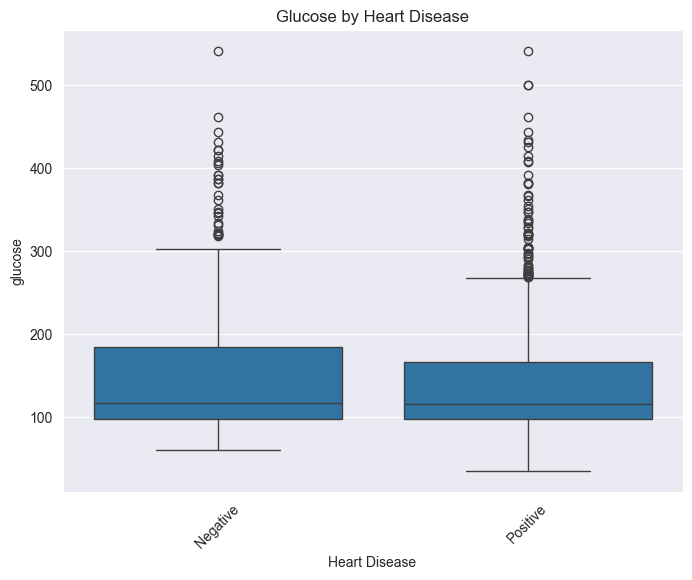

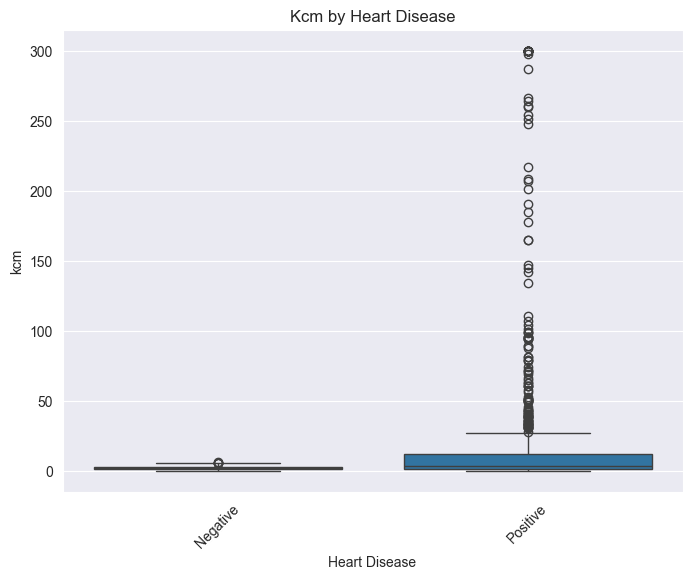

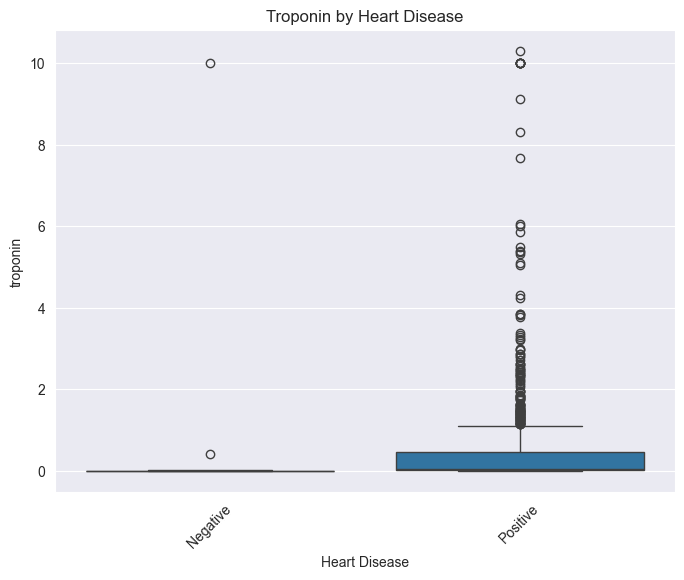

In [26]:
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(
        x=dataset1['heart_disease'].map({0: 'Negative', 1: 'Positive'}),
        y=col,
        data=dataset1,
    )
    plt.title(f'{col.capitalize()} by Heart Disease')
    plt.xlabel('Heart Disease')
    plt.xticks(rotation=45)
    plt.show()